In [4]:
qasm_str = """
include "qelib1.inc";
qreg q[2];
cu(2.13431562633248,5.350646294405996,2.4859039172485513,4.866465765080696) q[0],q[1];
"""

In [5]:
import pennylane as qml
from pennylane.tape import make_qscript, QuantumScript

qc = qml.from_qasm(qasm_str)
print(qml.draw(qc)())

0: ─╭U(M0)─┤  
1: ─╰U(M0)─┤  
M0 = 
[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.07406597-0.47689822j  0.        +0.j
  -0.42113483-0.76793736j]
 [ 0.        +0.j          0.        +0.j          1.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.61499667-0.62358754j  0.        +0.j
   0.47811677+0.06574213j]]


In [15]:
qs = make_qscript(qc)()
qasm_str_pennylane = qs.to_openqasm(measure_all=False)
print(qasm_str_pennylane)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
rz(11.05676742575686) q[0];
ry(1.7679655525118294) q[0];
rz(1.1945736265076667) q[0];
rz(11.648070962090944) q[1];
ry(1.5707963267948966) q[1];
rz(9.42477796076938) q[1];
cx q[1],q[0];
rz(0.0) q[0];
rx(1.219386317488504) q[1];
cx q[1],q[0];
rz(2.7952601622872653) q[0];
ry(2.7485135499089113) q[0];
rz(12.05550548208478) q[0];
rz(4.440892098500626e-16) q[1];
ry(1.5707963267948974) q[1];
rz(3.4198552159966096) q[1];



In [16]:
# store to files: qasm_start, qasm_pennylane
with open('qasm_start.qasm', 'w') as f:
    f.write(qasm_str)
with open('qasm_pennylane.qasm', 'w') as f:
    f.write(qasm_str_pennylane)

from mqt import qcec

result = qcec.verify(
    "qasm_start.qasm",
    "qasm_pennylane.qasm",
    transform_dynamic_circuit=True)
equiv = str(result.equivalence)
print(equiv)

not_equivalent


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qiskit.quantum_info import Operator
from qiskit.qasm2 import load, LEGACY_CUSTOM_INSTRUCTIONS

qc_start = load('qasm_start.qasm',
                custom_instructions=LEGACY_CUSTOM_INSTRUCTIONS)
qc_pennylane = load('qasm_pennylane.qasm',
                    custom_instructions=LEGACY_CUSTOM_INSTRUCTIONS)


op_start = Operator(qc_start)
op_pennylane = Operator(qc_pennylane)

print("Start")
print(op_start.data)

print("Pennylane Exported")
print(op_pennylane.data)

unitary_equiv = op_start.equiv(op_pennylane)
print("Are the unitaries equivalent?", unitary_equiv)

Start
[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.07406597-0.47689822j  0.        +0.j
  -0.42113483-0.76793736j]
 [ 0.        +0.j          0.        +0.j          1.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.61499667-0.62358754j  0.        +0.j
   0.47811677+0.06574213j]]
Pennylane Exported
[[ 9.49229584e-01+3.14584164e-01j  2.35657764e-16-6.64055839e-16j
   1.11035105e-16-4.07918502e-16j -1.87032964e-17-3.33697653e-16j]
 [ 1.53206331e-16-7.04242249e-16j  9.49229584e-01+3.14584164e-01j
  -9.67733676e-17-4.90923424e-16j  1.31663013e-16-6.04771645e-17j]
 [-5.42048940e-16-1.31959181e-16j -1.60034140e-16-2.41188979e-17j
   2.20330240e-01-4.29385913e-01j -1.58172704e-01-8.61431204e-01j]
 [-1.77434893e-16+3.43976794e-18j -3.84823169e-16-5.38891098e-17j
  -3.87602263e-01-7.85395957e-01j  4.33161154e-01+2.12812338e-01j]]
Are the unitaries equivalent? False


Real part of Start
[[ 1.          0.          0.          0.        ]
 [ 0.          0.07406597  0.         -0.42113483]
 [ 0.          0.          1.          0.        ]
 [ 0.         -0.61499667  0.          0.47811677]]
Pennylane


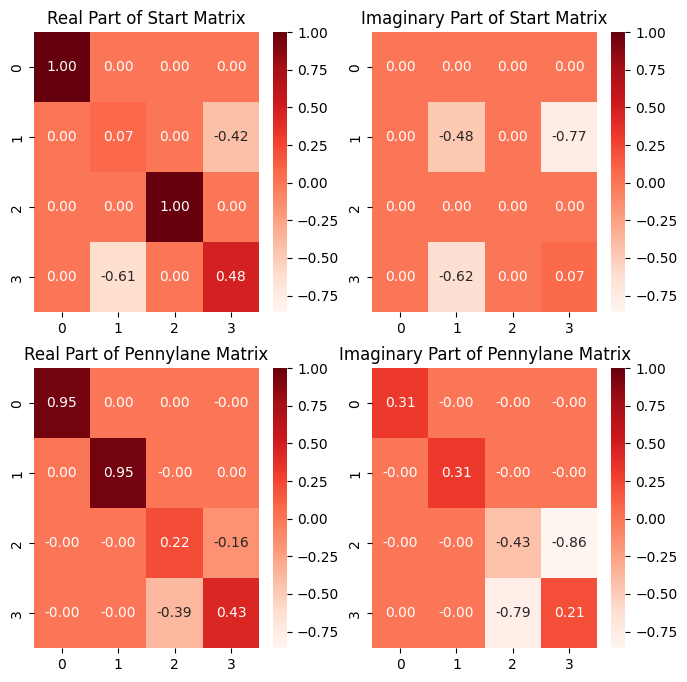

In [22]:


# print unitaries


def round_matrix(n_decimals: int, matrix):
    return np.round(matrix, n_decimals)


def plot_heatmaps_side_by_side(
        matrix1, matrix2, matrix3, matrix4, title1, title2, title3, title4):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    vmin = min(matrix1.min(), matrix2.min(), matrix3.min(), matrix4.min())
    vmax = max(matrix1.max(), matrix2.max(), matrix3.max(), matrix4.max())
    sns.heatmap(matrix1, annot=True, fmt=".2f", cmap='Reds',
                ax=axes[0, 0], vmin=vmin, vmax=vmax)
    axes[0, 0].set_title(title1)
    sns.heatmap(matrix2, annot=True, fmt=".2f", cmap='Reds',
                ax=axes[0, 1], vmin=vmin, vmax=vmax)
    axes[0, 1].set_title(title2)
    sns.heatmap(matrix3, annot=True, fmt=".2f", cmap='Reds',
                ax=axes[1, 0], vmin=vmin, vmax=vmax)
    axes[1, 0].set_title(title3)
    sns.heatmap(matrix4, annot=True, fmt=".2f", cmap='Reds',
                ax=axes[1, 1], vmin=vmin, vmax=vmax)
    axes[1, 1].set_title(title4)
    plt.show()


def split_real_imag(matrix):
    return matrix.real, matrix.imag


real_start, imag_start = split_real_imag(op_start.data)

print("Real part of Start")
print(real_start)

print("Pennylane")
real_pennylane, imag_pennylane = split_real_imag(op_pennylane.data)

plot_heatmaps_side_by_side(
    real_start, imag_start, real_pennylane, imag_pennylane,
    "Real Part of Start Matrix", "Imaginary Part of Start Matrix",
    "Real Part of Pennylane Matrix", "Imaginary Part of Pennylane Matrix")

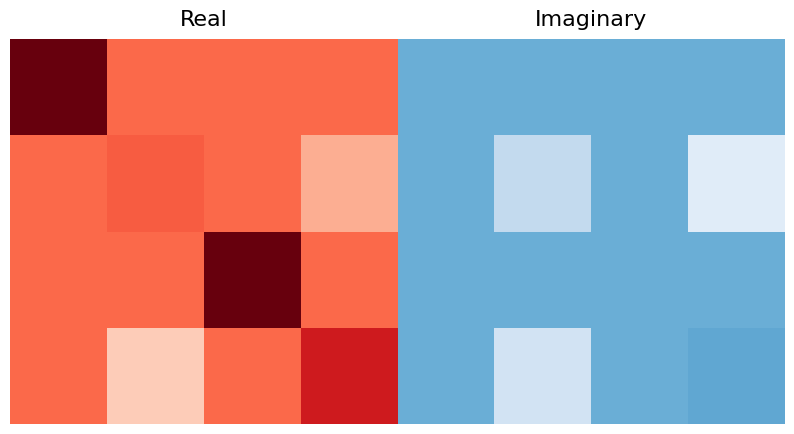

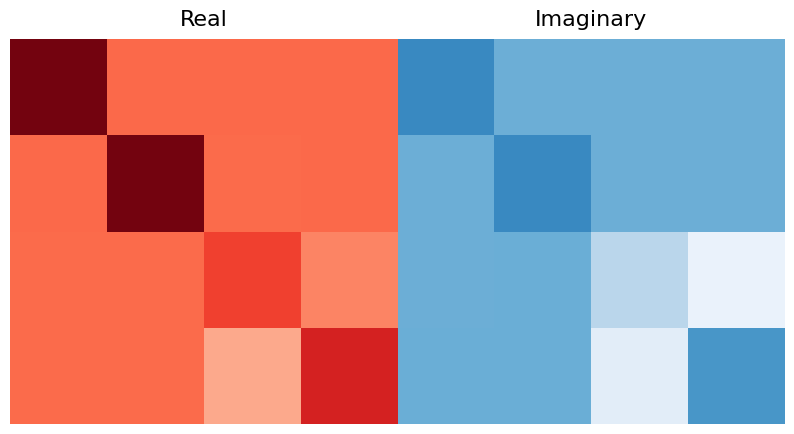

In [ ]:
def plot_combined_heatmaps(real_matrix, imag_matrix, filename):
    combined_matrix = np.hstack((real_matrix, imag_matrix))
    fig, ax = plt.subplots(figsize=(10, 5))
    vmin, vmax = -1, 1

    # Create a mask to apply different color maps
    mask = np.zeros_like(combined_matrix, dtype=bool)
    mask[:, :real_matrix.shape[1]] = True  # Left half (real part)

    # Plot the heatmap with different color maps
    sns.heatmap(combined_matrix, annot=False, fmt=".2f", cmap='Reds',
                cbar=False, ax=ax, vmin=vmin, vmax=vmax, mask=~mask)
    sns.heatmap(combined_matrix, annot=False, fmt=".2f", cmap='Blues',
                cbar=False, ax=ax, vmin=vmin, vmax=vmax, mask=mask)

    # Add titles
    ax.text(0.25, 1.05, 'Real', ha='center', va='center',
            transform=ax.transAxes, fontsize=16)
    ax.text(0.75, 1.05, 'Imaginary', ha='center',
            va='center', transform=ax.transAxes, fontsize=16)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.savefig(filename, bbox_inches='tight')
    plt.show()


plot_combined_heatmaps(real_start, imag_start, 'raw_start.png')
plot_combined_heatmaps(real_pennylane, imag_pennylane, 'raw_pennylane.png')